# ARIMA Process VS Sample

In [9]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

import statsmodels as sm 
import statsmodels.api as smt

import warnings
warnings.simplefilter('ignore')

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 3 # set fig width and height in inches

In [10]:
# Setting up required parameters
arparams = np.array([0.9]) 
zero_lag = np.array([1]) 
maparams = np.array([0.6, -0.5]) 

In [11]:
# Setting up required parameters
ar = np.r_[1, -arparams]
ma = np.r_[1, maparams]
c = 0

## Model 1 - AR(1): $y_t=c + 0.9 y_{t-1}+ \epsilon_t$
### (1) Defining a AR process

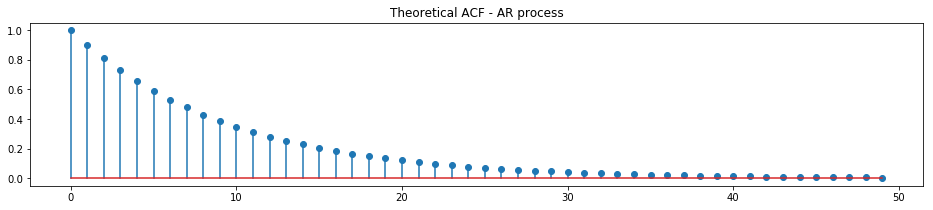

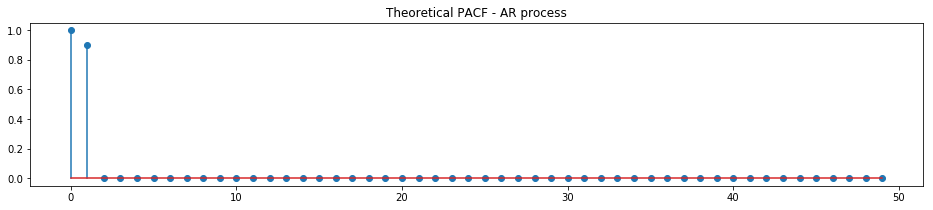

In [12]:
# Defining the process
ar_model = sm.tsa.arima_process.ArmaProcess(ar = ar, ma = zero_lag) 

# Plot theoretical ACF and PACF
plt.figure()
plt.title('Theoretical ACF - AR process')
plt.stem(ar_model.acf(50));

plt.figure()
plt.title('Theoretical PACF - AR process')
plt.stem(ar_model.pacf(50));

plt.show()

In [6]:
# Check Conditions
# Check stationaity
print("AR(1) Model is{0}stationary".format(" " if ar_model.isstationary else " not " ))

# Check invertibility
print("AR(1) Model is{0}invertible".format(" " if ar_model.isinvertible else " not " ))

AR(1) Model is stationary
AR(1) Model is invertible


### (2) Use the defined AR(1) process to generate a (particular) time series sample

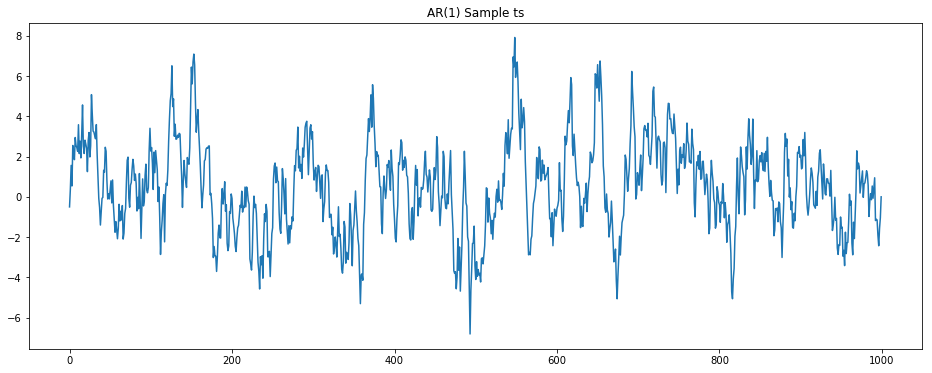

In [7]:
# Generating sample
y_AR = c + ar_model.generate_sample(1000)

# Plot the sample series
plt.figure()
plt.plot(y_AR)
plt.title("AR(1) Sample ts")
plt.show();

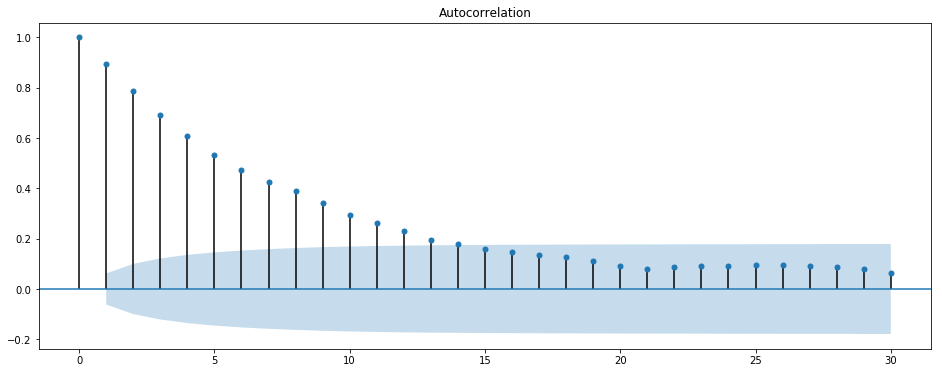

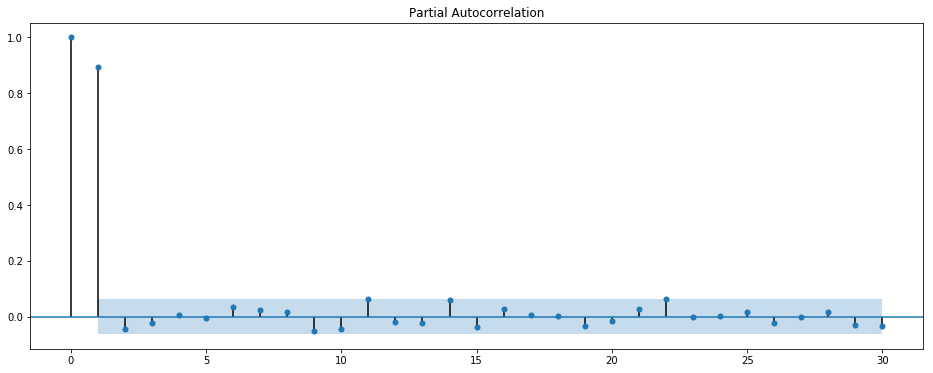

In [8]:
# Plot the sample ACF and PACF
plt.figure()
smt.graphics.tsa.plot_acf(y_AR, lags = 30, alpha = 0.05)

plt.figure()
smt.graphics.tsa.plot_pacf(y_AR, lags = 30, alpha = 0.05)
plt.show()

### (3) Fitting (back) the Sample ts

In [72]:
fit_AR = sm.tsa.arima_model.ARMA(y_AR, (1, 0)).fit(trend = 'nc') # AR(1), 0.9
print("Estimated Model Parameters: " + str(fit_AR.params))

Estimated Model Parameters: [0.88624636]


## Model 2 - MA(2): $y_t=c + 0.6\epsilon_{t-1} + (-0.5)\epsilon_{t-2}+ \epsilon_t$
### (1) Defining a MA process

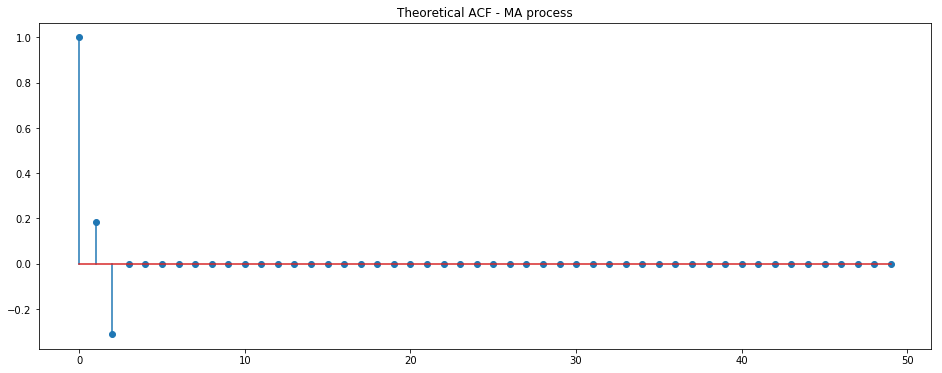

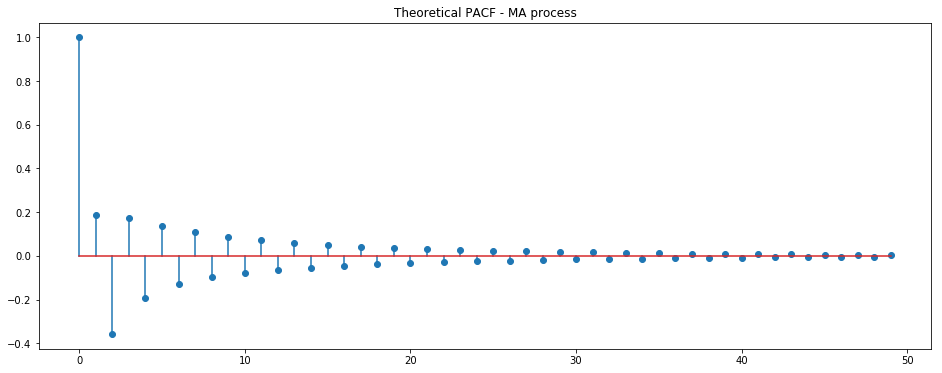

In [73]:
# Defining the process
ma_model = sm.tsa.arima_process.ArmaProcess(ar = zero_lag, ma = ma) 

# Plot theoretical ACF and PACF
plt.figure()
plt.title('Theoretical ACF - MA process')
plt.stem(ma_model.acf(50));

plt.figure()
plt.title('Theoretical PACF - MA process')
plt.stem(ma_model.pacf(50));

plt.show()

In [74]:
# Check Conditions
# Check stationaity
print("MA(2) Model is{0}stationary".format(" " if ma_model.isstationary else " not " ))

# Check invertibility
print("MA(2) Model is{0}invertible".format(" " if ma_model.isinvertible else " not " ))

MA(2) Model is stationary
MA(2) Model is not invertible


### (2) Use the defined MA(2) process to generate a (particular) time series sample

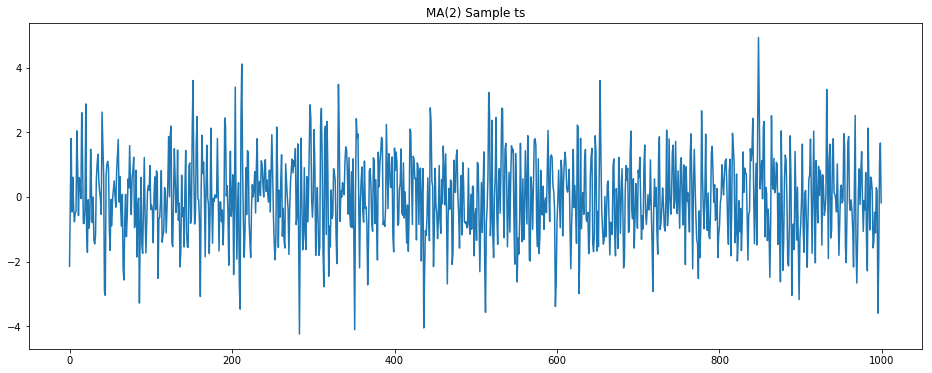

In [75]:
# Generating sample
y_MA = c + ma_model.generate_sample(1000)

# Plot the sample series
plt.figure()
plt.plot(y_MA)
plt.title("MA(2) Sample ts")
plt.show();

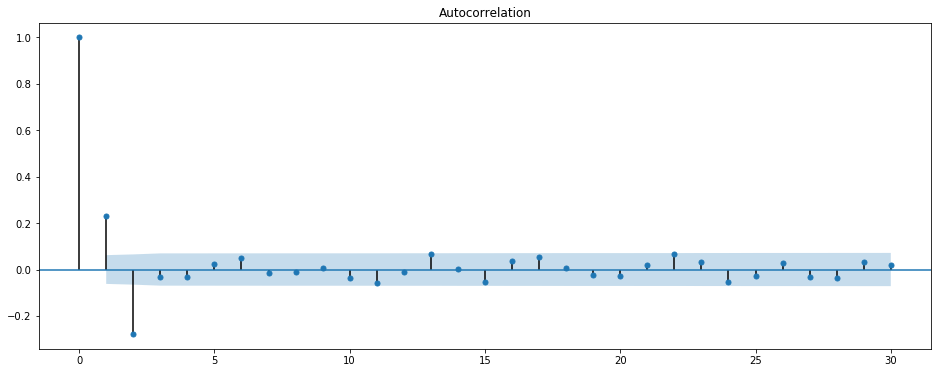

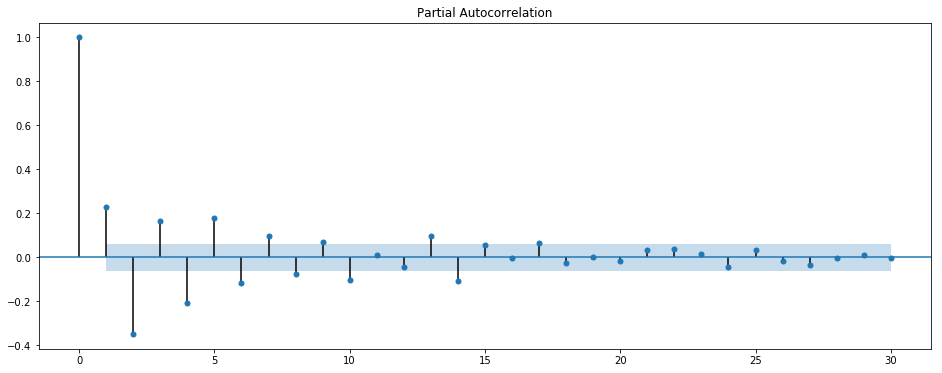

In [76]:
# Plot the sample ACF and PACF
plt.figure()
smt.graphics.tsa.plot_acf(y_MA, lags = 30, alpha = 0.05)

plt.figure()
smt.graphics.tsa.plot_pacf(y_MA, lags = 30, alpha = 0.05)
plt.show()

### (3) Fitting (back) the Sample ts

In [77]:
fit_MA = sm.tsa.arima_model.ARMA(y_MA, (0, 2)).fit(trend = 'nc') # MA(2), 0.5, -0.6
print("Estimated Model Parameters: " + str(fit_MA.params))

Estimated Model Parameters: [ 0.51619781 -0.3864295 ]


## Model 3 - ARMA(1,2): $y_t=c + 0.9 y_{t-1} + 0.6\epsilon_{t-1} + (-0.5)\epsilon_{t-2}+ \epsilon_t$
### (1) Defining a ARMA process

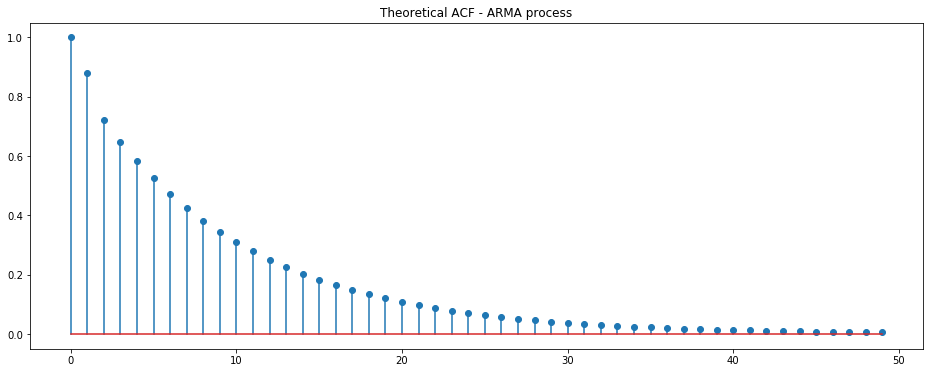

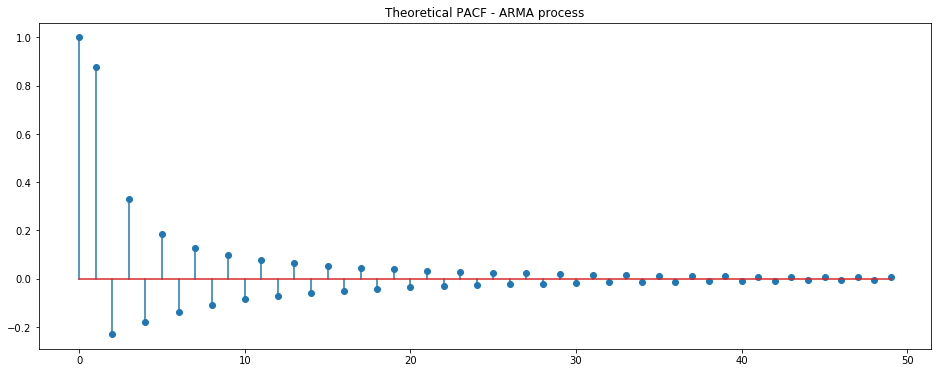

In [78]:
# Defining the process
arma_model = sm.tsa.arima_process.ArmaProcess(ar = ar, ma = ma) 

# Plot theoretical ACF and PACF
plt.figure()
plt.title('Theoretical ACF - ARMA process')
plt.stem(arma_model.acf(50));

plt.figure()
plt.title('Theoretical PACF - ARMA process')
plt.stem(arma_model.pacf(50));

plt.show()

In [79]:
# Check Conditions
# Check stationaity
print("ARMA(1,2) Model is{0}stationary".format(" " if ma_model.isstationary else " not " ))

# Check invertibility
print("ARMA(1,2) Model is{0}invertible".format(" " if ma_model.isinvertible else " not " ))

ARMA(1,2) Model is stationary
ARMA(1,2) Model is not invertible


### (2) Use the defined ARMA(1,2) process to generate a (particular) time series sample

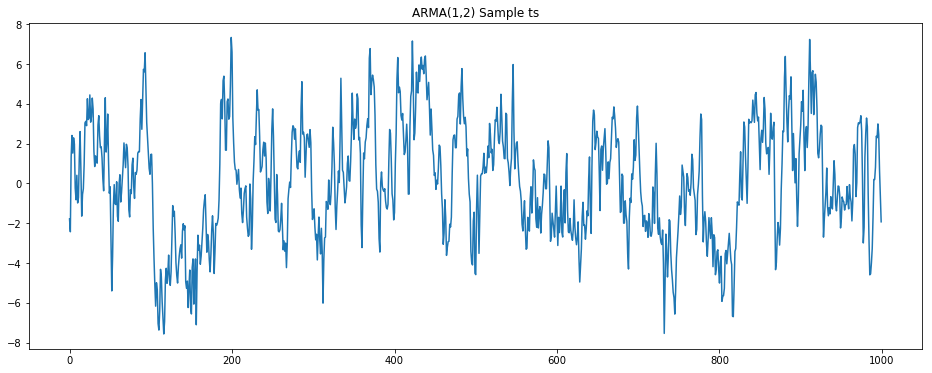

In [80]:
# Generating sample
y_ARMA = c + arma_model.generate_sample(1000)

# Plot the sample series
plt.figure()
plt.plot(y_ARMA)
plt.title("ARMA(1,2) Sample ts")
plt.show();

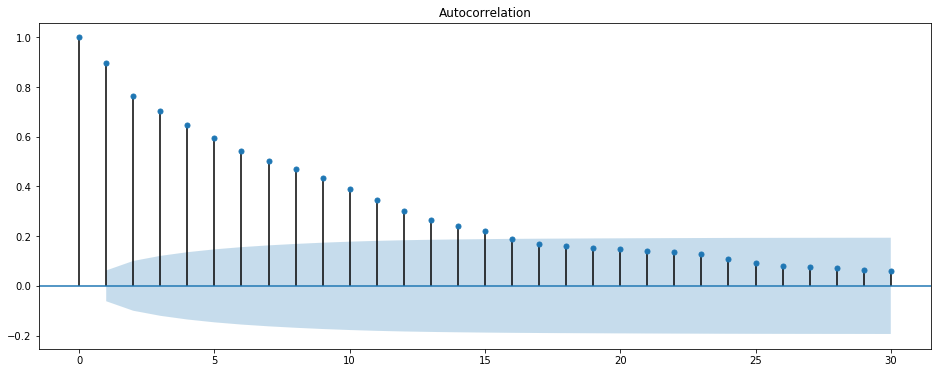

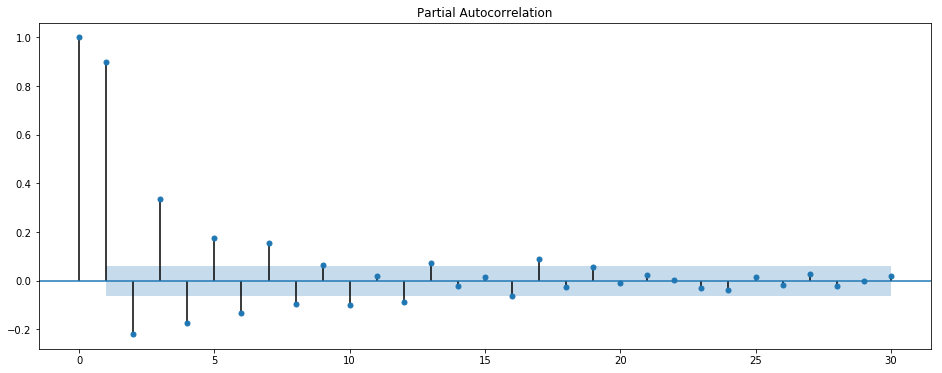

In [81]:
# Plot the sample ACF and PACF
plt.figure()
smt.graphics.tsa.plot_acf(y_ARMA, lags = 30, alpha = 0.05)

plt.figure()
smt.graphics.tsa.plot_pacf(y_ARMA, lags = 30, alpha = 0.05)
plt.show()

### (3) Fitting (back) the Sample ts

In [82]:
fit_ARMA = sm.tsa.arima_model.ARMA(y_ARMA, (1, 2)).fit(trend = 'nc') # ARMA(1,2). 0.9, 0.5, -0.6
print("Estimated Model Parameters: " + str(fit_ARMA.params))

Estimated Model Parameters: [ 0.9190237   0.46313401 -0.44887167]
